# Hotel Booking Demand 

In this notebook we will go through some details regarding hotel booking information by doing exploratory data analysis.
Some of the things we are going to explore are:
- Number of guests by countries
- Types of deposits made by guests
- Number of repeated guests
- Number of bookings by market segment
- Length of stay
- Average room prices per night
- Room price variation over the years
- Average daily rate by market segment
<br>

Next, in a separate notebook we will go deeper into comparing canceled and non canceled bookings and predicting cancelation using machine learning models, along with the model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os

The dataset we will use originally comes from the article "Hotel Booking Demand Datasets" (https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5) written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.
<br>

This data set contains booking information for a city hotel and a resort hotel in Portugal, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of cancelations, among other things.
<br>
All personally identifying information has been removed from the data.
<br>

Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

In [2]:
os.chdir('/Users/neera/Documents/PROJECTS/Hotel Booking')
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape

(119390, 32)

In [5]:
listItem = []

for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum())/len(data[col])), 
                    data[col].nunique(), list(data[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,[City Hotel]
1,is_canceled,int64,0,0.0,2,[1]
2,lead_time,int64,0,0.0,479,[347]
3,arrival_date_year,int64,0,0.0,3,[2017]
4,arrival_date_month,object,0,0.0,12,[May]
5,arrival_date_week_number,int64,0,0.0,53,[48]
6,arrival_date_day_of_month,int64,0,0.0,31,[27]
7,stays_in_weekend_nights,int64,0,0.0,17,[1]
8,stays_in_week_nights,int64,0,0.0,35,[2]
9,adults,int64,0,0.0,14,[6]


#### Findings:
- There are null values in the columns = children, country, agent, and company.
- The children column data type should be integer instead of float.

According to the data source, in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.
<br>

So we will replace the missing or undefined values in these columns:
- agent: If no agency is given, booking was most likely made without one. We will replace null with 0.
- company: If none given, it was most likely private. We will replace null with 0.
- children: We will replace null with 0.
- country: We will replace null with 'Unknown'.
- meal: Contains values 'Undefined', which is equal to SC (no meal package).

In [6]:
replacements = {
    'children': 0.0, 
    'country': 'Unknown', 
    'agent': 0,
    'company': 0
}
data_cleaned = data.fillna(replacements)

In [7]:
data_cleaned['meal'].replace('Undefined', 'SC', inplace=True)

In [8]:
data_cleaned['children'] = data_cleaned['children'].astype(int)

**Some rows contain entries with 0 adults, 0 children and 0 babies. We will drop these entries with no guests.**

In [9]:
zero_guest = list(
    data_cleaned[data_cleaned['adults'] 
                 + data_cleaned['children'] 
                 + data_cleaned['babies'] == 0].index)

In [10]:
data_cleaned.drop(data_cleaned.index[zero_guest], inplace=True)

In [11]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119210 non-null object
is_canceled                       119210 non-null int64
lead_time                         119210 non-null int64
arrival_date_year                 119210 non-null int64
arrival_date_month                119210 non-null object
arrival_date_week_number          119210 non-null int64
arrival_date_day_of_month         119210 non-null int64
stays_in_weekend_nights           119210 non-null int64
stays_in_week_nights              119210 non-null int64
adults                            119210 non-null int64
children                          119210 non-null int64
babies                            119210 non-null int64
meal                              119210 non-null object
country                           119210 non-null object
market_segment                    119210 non-null object
distribution_channel              119210 non

In [12]:
data_cleaned.to_csv('data_cleaned.csv', index=False)

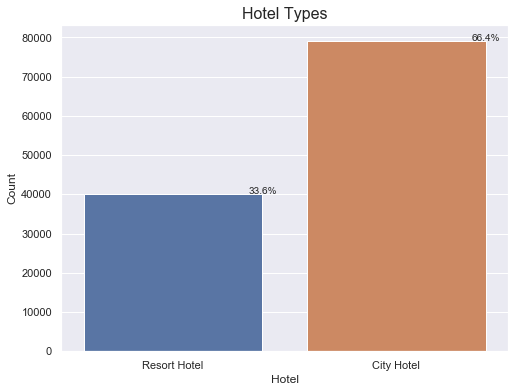

In [13]:
plt.figure(figsize=(8, 6))
total = float(len(data_cleaned))
ax = sns.countplot(x='hotel', data = data_cleaned)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.title('Hotel Types', fontsize=16)
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Findings:
- The dataset contains data from two different hotels; **Resort Hotel** and **City Hotel**. 
- According to the graph, 33.6% of the data was booked for resort hotel and the rest of was booked for City Hotel.
<br>

From the publication, we know that both hotels are located in Portugal (southern Europe), the  resort hotel at the resort region of Algarve and the city hotel at the city of Lisbon.

Then we will create two dataframes for each type of hotel.

In [14]:
resort = data_cleaned.loc[data_cleaned['hotel'] == 'Resort Hotel']
city = data_cleaned.loc[data_cleaned['hotel'] == 'City Hotel']

## Exploratory Data Analysis

### NUMBER OF GUESTS BY COUNTRIES

In [15]:
data_cleaned['country'].nunique()

178

In [16]:
country_data = pd.DataFrame(data_cleaned['country'].value_counts())
country_data.rename(columns={'country': 'Number of Guests'}, inplace=True)
country_data = country_data[:10]
country_data.index.names = ['Country']

In [17]:
country_data

,Number of Guests
Country,
PRT,48483
GBR,12120
FRA,10401
ESP,8560
DEU,7285
ITA,3761
IRL,3374
BEL,2342
BRA,2222


**Findings:** 
<br>
Most of the customers came from Portugal, and top 10 guests country origins are mostly European countries. This makes sense since both hotels are located in Portugal.
<br>
The top 10 countries are: Portugal, Great Britain, France, Spain, Germany, Italy, Ireland, Belgium, Brazil, and Netherlands.

### TYPE OF DEPOSITS MADE BY GUESTS

In [18]:
deposit_data = pd.DataFrame(data_cleaned['deposit_type'].value_counts())
deposit_data.rename(columns={'deposit_type': 'Number of Guests'}, inplace=True)
deposit_data.index.names = ['Deposit Type']
deposit_data

,Number of Guests
Deposit Type,
No Deposit,104461
Non Refund,14587
Refundable,162


**Deposit Type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
- No Deposit – no deposit was made
- Non Refund – a deposit was made in the value of the total stay cost
- Refundable – a deposit was made with a value under the total cost of stay

**Findings:** Most of the guests made no deposit, followed by the guests who made non-refundable deposits, then the least is the number of guests who made refundable deposits.

### NUMBER OF REPEATED GUESTS

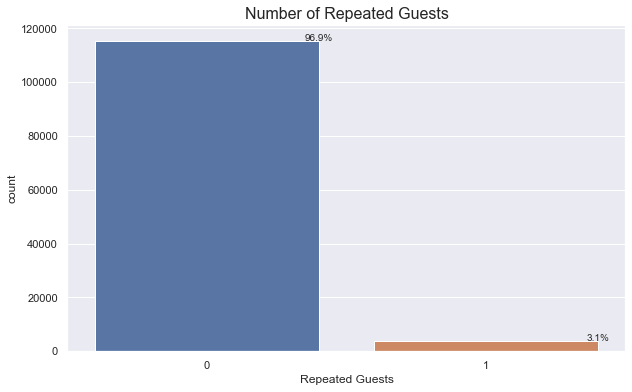

In [19]:
plt.figure(figsize=(10,6))
total = float(len(data_cleaned))
ax = sns.countplot(x=data_cleaned['is_repeated_guest'], order=data_cleaned['is_repeated_guest'].value_counts(ascending=False).index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.title('Number of Repeated Guests', fontdict = {'fontsize':16})
plt.xlabel('Repeated Guests')
plt.show()

**Is Repeated Guests:** Values indicating if the booking name was from a repeated guest (1) or not (0).

**Findings:** There are only 3% repeated guests throughout the entire dataset.

### BOOKINGS BY MARKET SEGMENT

In [20]:
data_cleaned['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

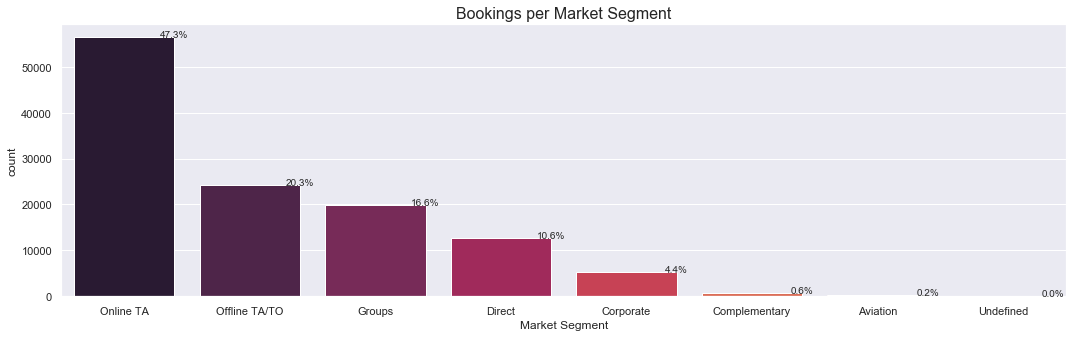

In [21]:
plt.figure(figsize=(18, 5))
total = float(len(data_cleaned))
ax = sns.countplot(x='market_segment', 
                   data=data_cleaned, 
                   order=data_cleaned['market_segment'].value_counts().index, 
                   palette='rocket')
plt.title('Bookings per Market Segment', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel('Market Segment')
plt.show()

**Market Segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**Findings:**
<br>
The statistics show that online hotel and reservations are increased in recent years. Most people complete their reservation via their smartphones. The above graph summarized these statistics. More than 45% of bookings are made via Online Travel Agents and around 20% of bookings made via Offline Travel Agents.

### HOW LONG DO PEOPLE STAY AT THE HOTELS?

In [22]:
resort['total_nights'] = resort['stays_in_weekend_nights'] + resort['stays_in_week_nights']
city['total_nights'] = city['stays_in_weekend_nights'] + city['stays_in_week_nights']

In [23]:
num_nights_resort = list(resort['total_nights'].value_counts().index)
num_bookings_resort = list(resort['total_nights'].value_counts())
percent_nights_resort = resort['total_nights'].value_counts() / sum(num_bookings_resort) * 100

In [24]:
num_nights_city = list(city['total_nights'].value_counts().index)
num_bookings_city = list(city['total_nights'].value_counts())
percent_nights_city = city['total_nights'].value_counts() / sum(num_bookings_city) * 100

In [25]:
resort_nights = pd.DataFrame({'hotel': 'Resort Hotel',
                           'num_nights': num_nights_resort,
                           'relative_bookings': percent_nights_resort})

city_nights = pd.DataFrame({'hotel': 'City Hotel',
                           'num_nights': num_nights_city,
                           'relative_bookings': percent_nights_city})

nights_data = pd.concat([resort_nights, city_nights], ignore_index=True)

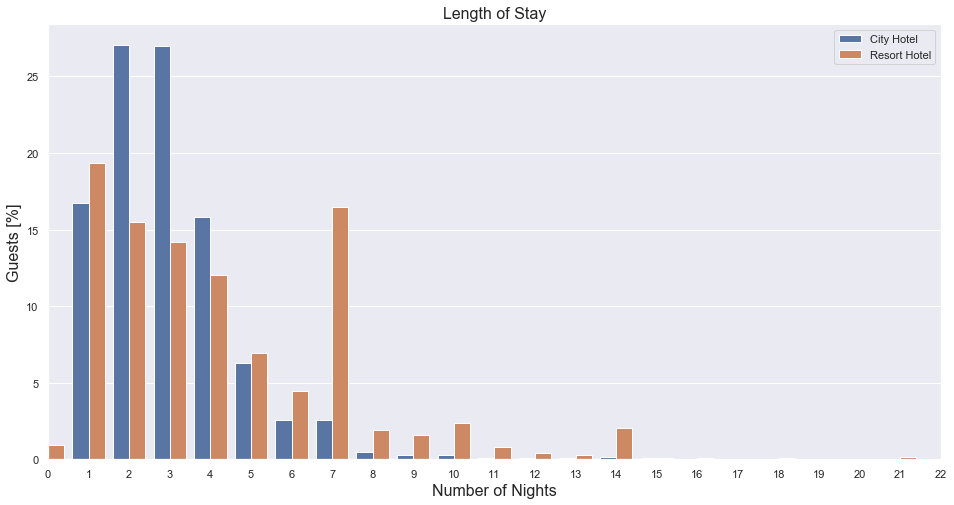

In [26]:
plt.figure(figsize=(16, 8))
sns.barplot(x = 'num_nights', y='relative_bookings', hue='hotel', data=nights_data, 
            hue_order = ['City Hotel', 'Resort Hotel'])
plt.title('Length of Stay', fontsize=16)
plt.xlabel('Number of Nights', fontsize=16)
plt.ylabel('Guests [%]', fontsize=16)
plt.legend(loc='upper right')
plt.xlim(0, 22)
plt.show()

In [27]:
avg_nights_res = sum(list((resort_nights['num_nights'] * (resort_nights['relative_bookings']/100)).values))
avg_nights_city = sum(list((city_nights['num_nights'] * (city_nights['relative_bookings']/100)).values))
print("On average, guests of the City hotel stay {:.0f} nights, and {} at maximum.".format(avg_nights_city,city_nights['num_nights'].max()))
print("On average, guests of the Resort hotel stay {:.0f} nights, and {} at maximum.".format(avg_nights_res, resort_nights['num_nights'].max()))

On average, guests of the City hotel stay 3 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4 nights, and 69 at maximum.


**Findings:**
<br>
- For the city hotel there is a clear preference for 1-4 nights.
- For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.

### HOW MUCH DO GUESTS PAY FOR A ROOM PER NIGHT?

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.
Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

**adr: Average Daily Rate**, measures the average rental revenue earned for an occupied room per day. It is measured as the total revenues generated by all the occupied rooms in a hotel or lodge divided by the total number of occupied rooms over a given time period. 

In [28]:
print("""From all bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night.
City hotel: {:.2f} € per night.""".format(resort['adr'].mean(), city['adr'].mean()))

From all bookings, across all room types and meals, the average prices are:
Resort hotel: 94.98 € per night.
City hotel: 105.50 € per night.


In [29]:
resort['adr_pp'] = resort['adr'] / (resort['adults'] + resort['children'])
city['adr_pp'] = city['adr'] / (city['adults'] + city['children'])

In [30]:
print("""From all bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night per person.
City hotel: {:.2f} € per night per person.""".format(resort['adr_pp'].mean(), city['adr_pp'].mean()))

From all bookings, across all room types and meals, the average prices are:
Resort hotel: 48.48 € per night per person.
City hotel: 58.49 € per night per person.


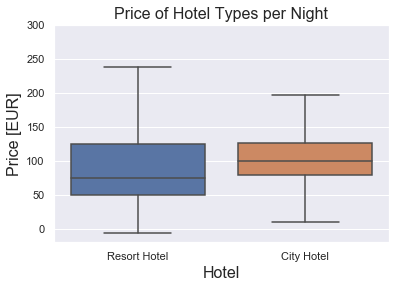

In [31]:
# plt.figure(figsize=(15, 8))
sns.boxplot(x='hotel',
            y='adr',
            data=data_cleaned, 
            hue_order=['City Hotel', 'Resort Hotel'],
            fliersize=0)
plt.title('Price of Hotel Types per Night', fontsize=16)
plt.xlabel('Hotel', fontsize=16)
plt.ylabel('Price [EUR]', fontsize=16)
plt.ylim(-20, 300)
plt.show()

The Resort Hotel price has lower median, but higher variability (more dispersed data) compared to the City Hotel. This could be because the price for resort hotel is more likely to be affected by seasons. 
<br>
Later we will se how the prices vary over the years.

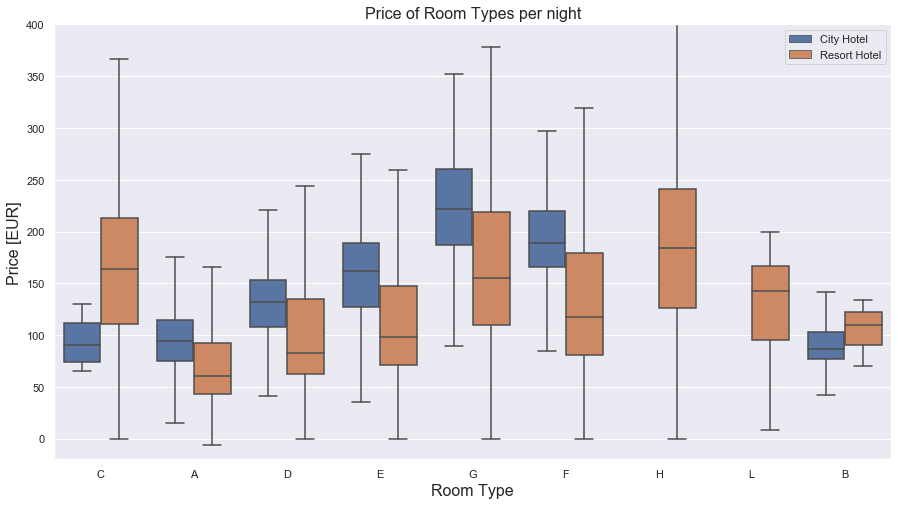

In [32]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='reserved_room_type',
            y='adr',
            hue='hotel',
            data=data_cleaned, 
            hue_order=['City Hotel', 'Resort Hotel'],
            fliersize=0)
plt.title('Price of Room Types per night', fontsize=16)
plt.xlabel('Room Type', fontsize=16)
plt.ylabel('Price [EUR]', fontsize=16)
plt.legend(loc='upper right')
plt.ylim(-20, 400)
plt.show()

This figure shows the average price per room depending on its type.
Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.
<br>
In general, room type A and B has the lowest price for both resort and city hotel. Also we can see that the city hotel is more expensive than resort hotel accross different room types, with the exception of room type B and C.

### HOW DOES THE PRICE PER NIGHT VARY OVER THE YEARS?

In [33]:
room_prices_mothly = data_cleaned[['hotel', 'arrival_date_month', 'adr']].sort_values('arrival_date_month')

Order the data by month:

In [34]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December']
room_prices_mothly['arrival_date_month'] = pd.Categorical(
            room_prices_mothly['arrival_date_month'], categories=ordered_months, ordered=True)

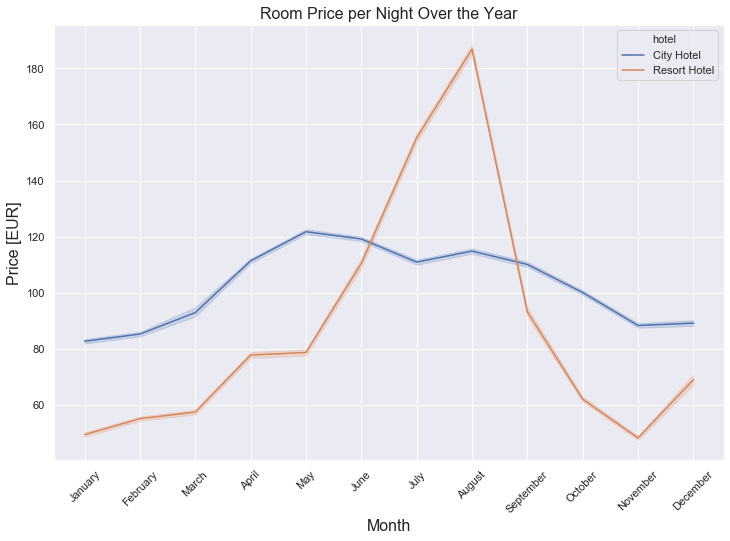

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'arrival_date_month', y='adr', hue='hotel', data=room_prices_mothly, 
            hue_order = ['City Hotel', 'Resort Hotel'])
plt.title('Room Price per Night Over the Year', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price [EUR]', fontsize=16)
plt.show()

**Findings:**
- This clearly shows that the prices in the Resort hotel are much higher during the summer, which is not surprising.
- The price of the city hotel varies less and is most expensive during spring, then summer.

### AVERAGE DAILY RATE BY MARKET SEGMENT

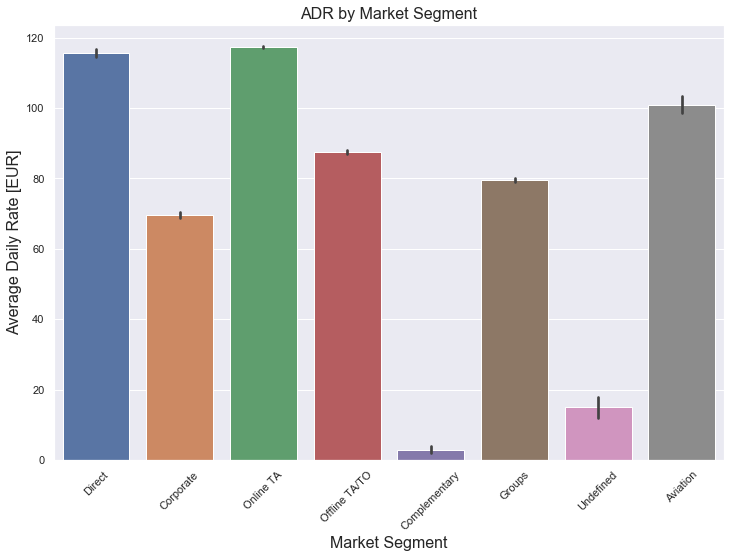

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x='market_segment',
            y='adr',
            data=data_cleaned
           )
plt.title("ADR by Market Segment", fontsize=16)
plt.xlabel("Market Segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate [EUR]", fontsize=16)
plt.show()

The segment who gets the most expensive rate is the online travel agent. This is saying a lot because most of the bookings came from them (47.3%). The price is higher, yet people still choose them, probably for the convenience. 